# 몬테카를로 베이지안 분석

베이지안 모수추정 참고 https://datascienceschool.net/view-notebook/ae35a40deb884cf88e85135b4b5a1130/

몬테카를로 방법(Monte Carlo method)은 난수(Random number: 어떠한범위에서 무작위로 추출된수)를 이용하여 함수의 값을 확률적으로 계산하는 알고리즘을 부르는 용어이다. 수학이나 물리학 등에 자주 사용되며, 계산하려는 값이 닫힌 형식으로 표현되지 않거나 복잡한 경우에 근사적으로 계산할 때 사용된다. 스타니스와프 울람이 모나코의 유명한 도박의 도시 몬테카를로의 이름을 본따 명명하였다.
1930년 엔리코 페르미가 중성자의 특성을 연구하기 위해 이 방법을 사용한 것으로 유명하다. 맨해튼 계획의 시뮬레이션이나 수소폭탄의 개발에서도 핵심적인 역할을 담당하였다.
알고리즘의 반복과 큰 수의 계산이 관련되기 때문에 몬테카를로는 다양한 컴퓨터 모의 실험 기술을 사용하여 컴퓨터로 계산하는 것이 적합하다.

예시: 원주율 구하는 방법: (0,1)(1,0) 범위에서 난수를 만들어서 x^2+y^2<=1인경우, 원 안에 속한 점들의 갯수를 계산 

## Rejection Sampling

내가 가지고 싶은 모형은 빨간색 모형이나 빨간색모형은 이론이 존재하지 않고 파이썬이 구현하지 않는다. 빨간색모형보다 크지만 최소로 큰 커버가능한 Kq 모형을 만든다
z 가 0의 위치에 있을때 모수를 빨간색개수/파란색개수만큼 정한다. 그러면 빨간색만큼의 비율로 뽑힌다. Z -1일때 만약 빨간색이 없다면 모수를 0으로 지정한다, 즉 0의 확률의 모수를 정한다.  

당장 샘플링 가능한 유사 확률분포를 사용하여 목표 확률분포의 샘플을 생성

* $p(x)$: 샘플링하고자 하는 목표 확률분포
* $q(x)$: 샘플링 가능한 유사 확률분포
* $k$: $kq(x) \geq p(x)$가 되도록 하는 스케일링 상수

> $p(z)/kq(z)$의 확률로 $q(x)$의 샘플을 채택

<img src="https://datascienceschool.net/upfiles/82be070d572241ebadda0eb9f7036484.png" />

In [22]:
a = 2
b = 6
rv_p = sp.stats.beta(a, b) ## 베타분포
rv_q = sp.stats.norm(loc=0.5, scale=0.5)## 정규분포 
k = 5

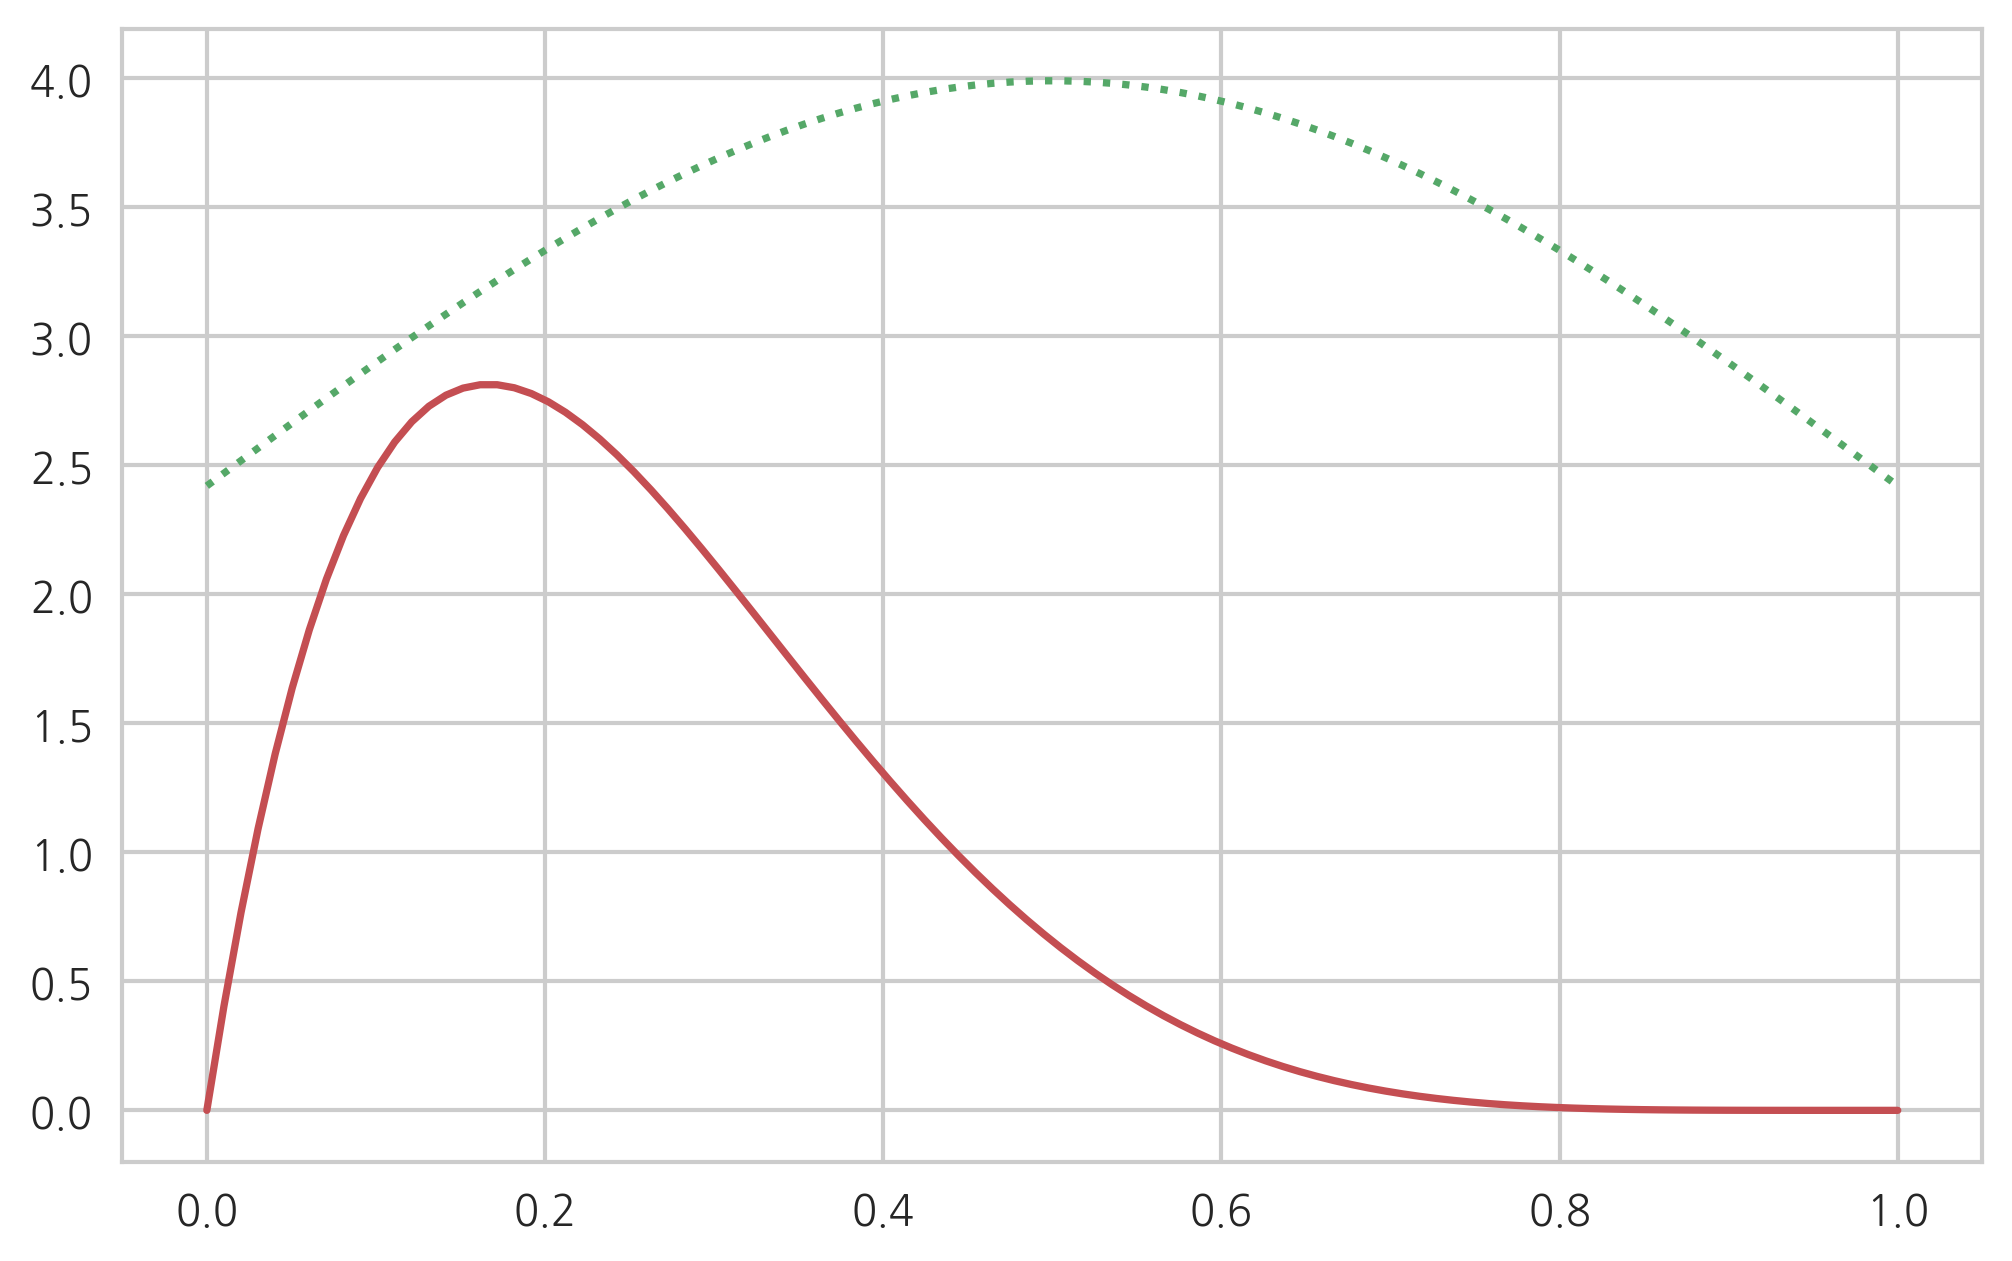

In [2]:
xx = np.linspace(0, 1, 100)
plt.plot(xx, rv_p.pdf(xx), 'r-')
plt.plot(xx, rv_q.pdf(xx) * k, 'g:')
plt.show()

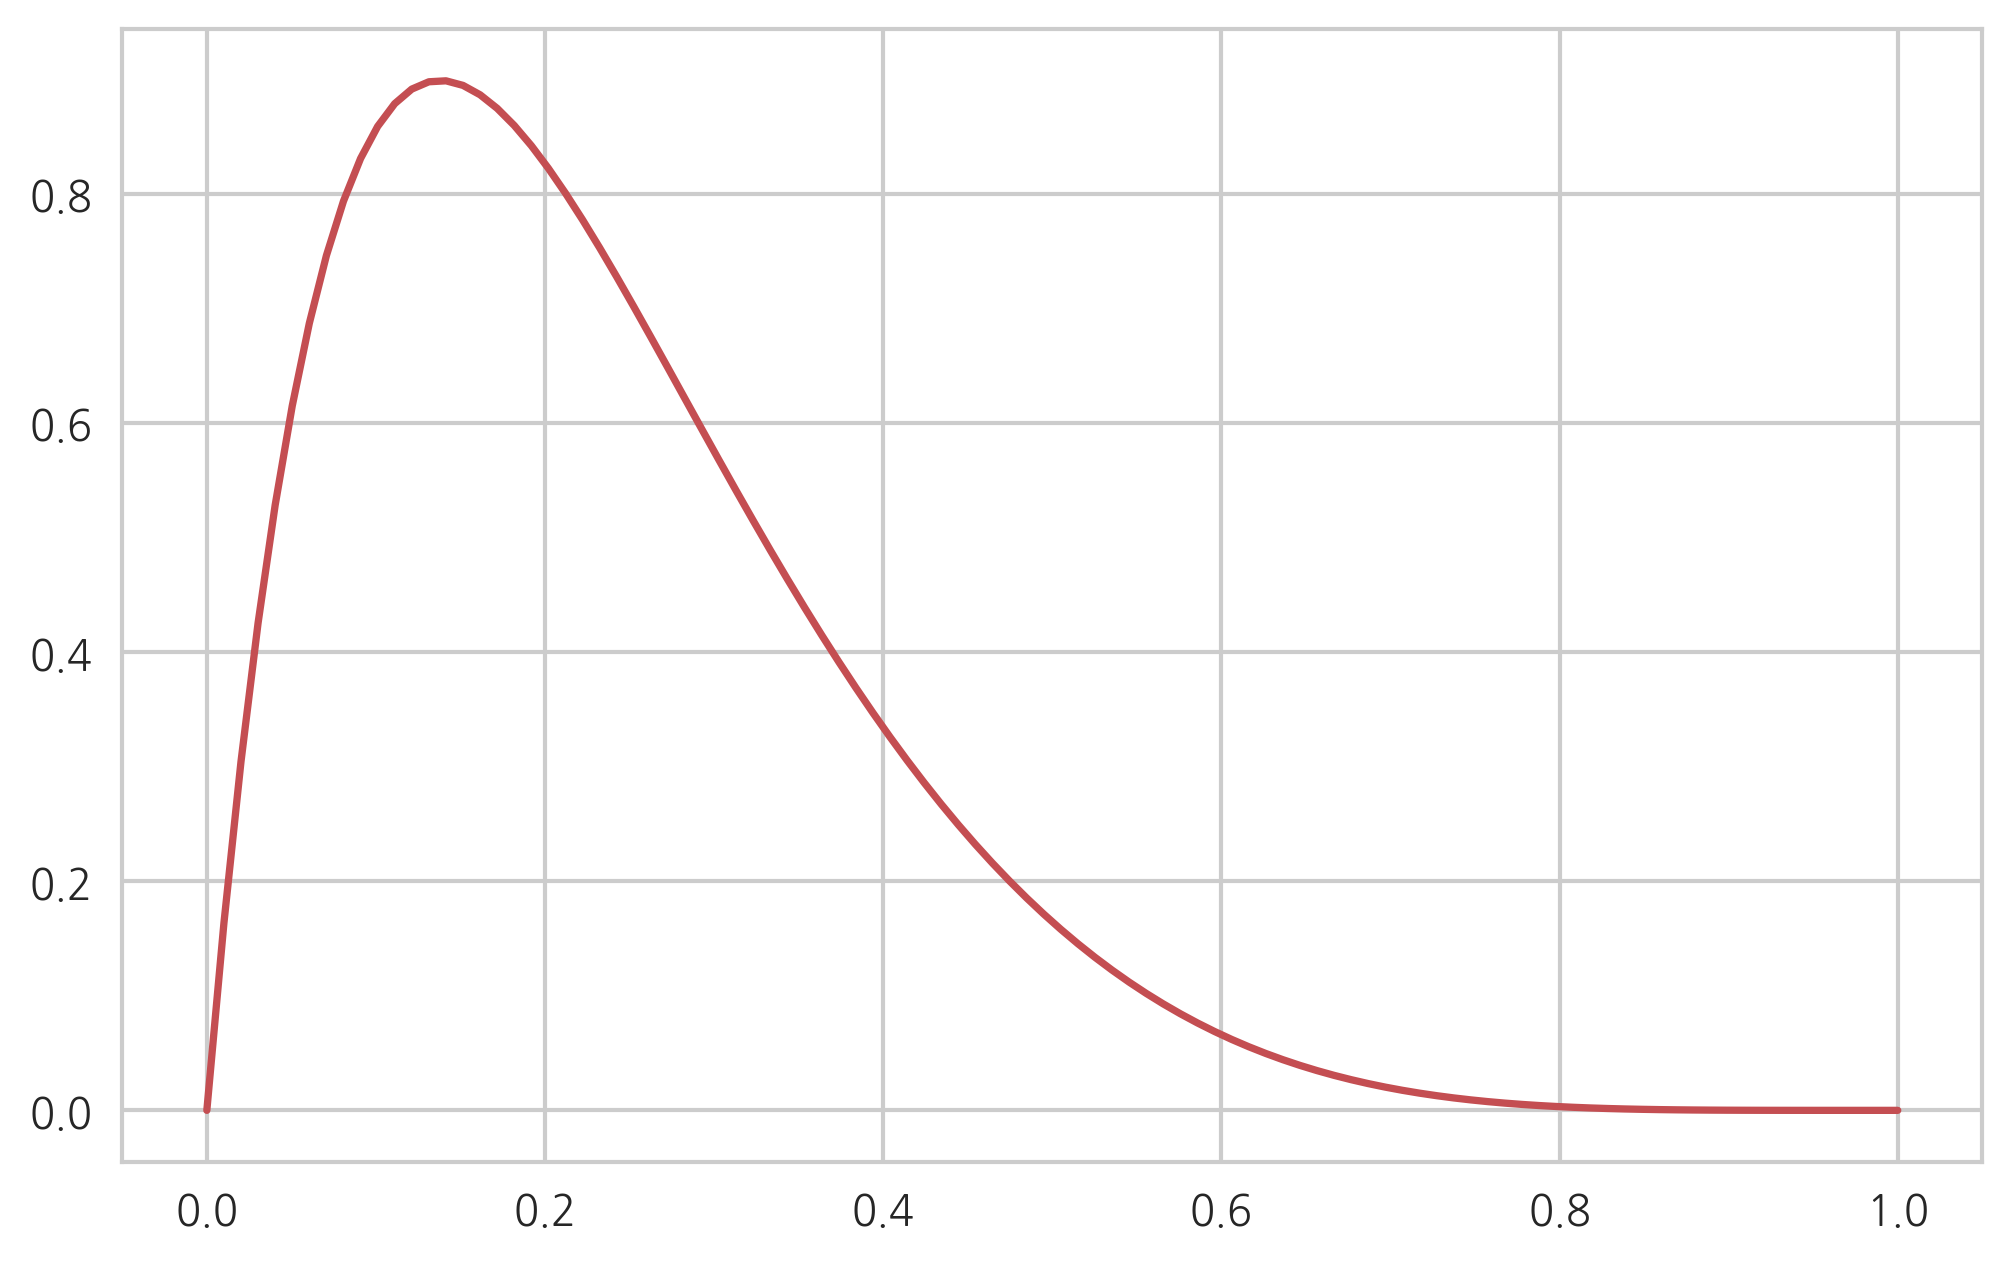

In [21]:
plt.plot(xx, rv_p.pdf(xx) / (rv_q.pdf(xx) * k), 'r-')
plt.show()

In [3]:
np.random.seed(1)
x_q = rv_q.rvs(int(1e4)) ## 만개의 개수를 rvs로 돌려서 히스토그램만듬 
x_q = x_q[(x_q >= 0) & (x_q <= 1)]
crits = rv_p.pdf(x_q) / (rv_q.pdf(x_q) * k)
coins = np.random.rand(len(x_q))
x_p = x_q[coins < crits]

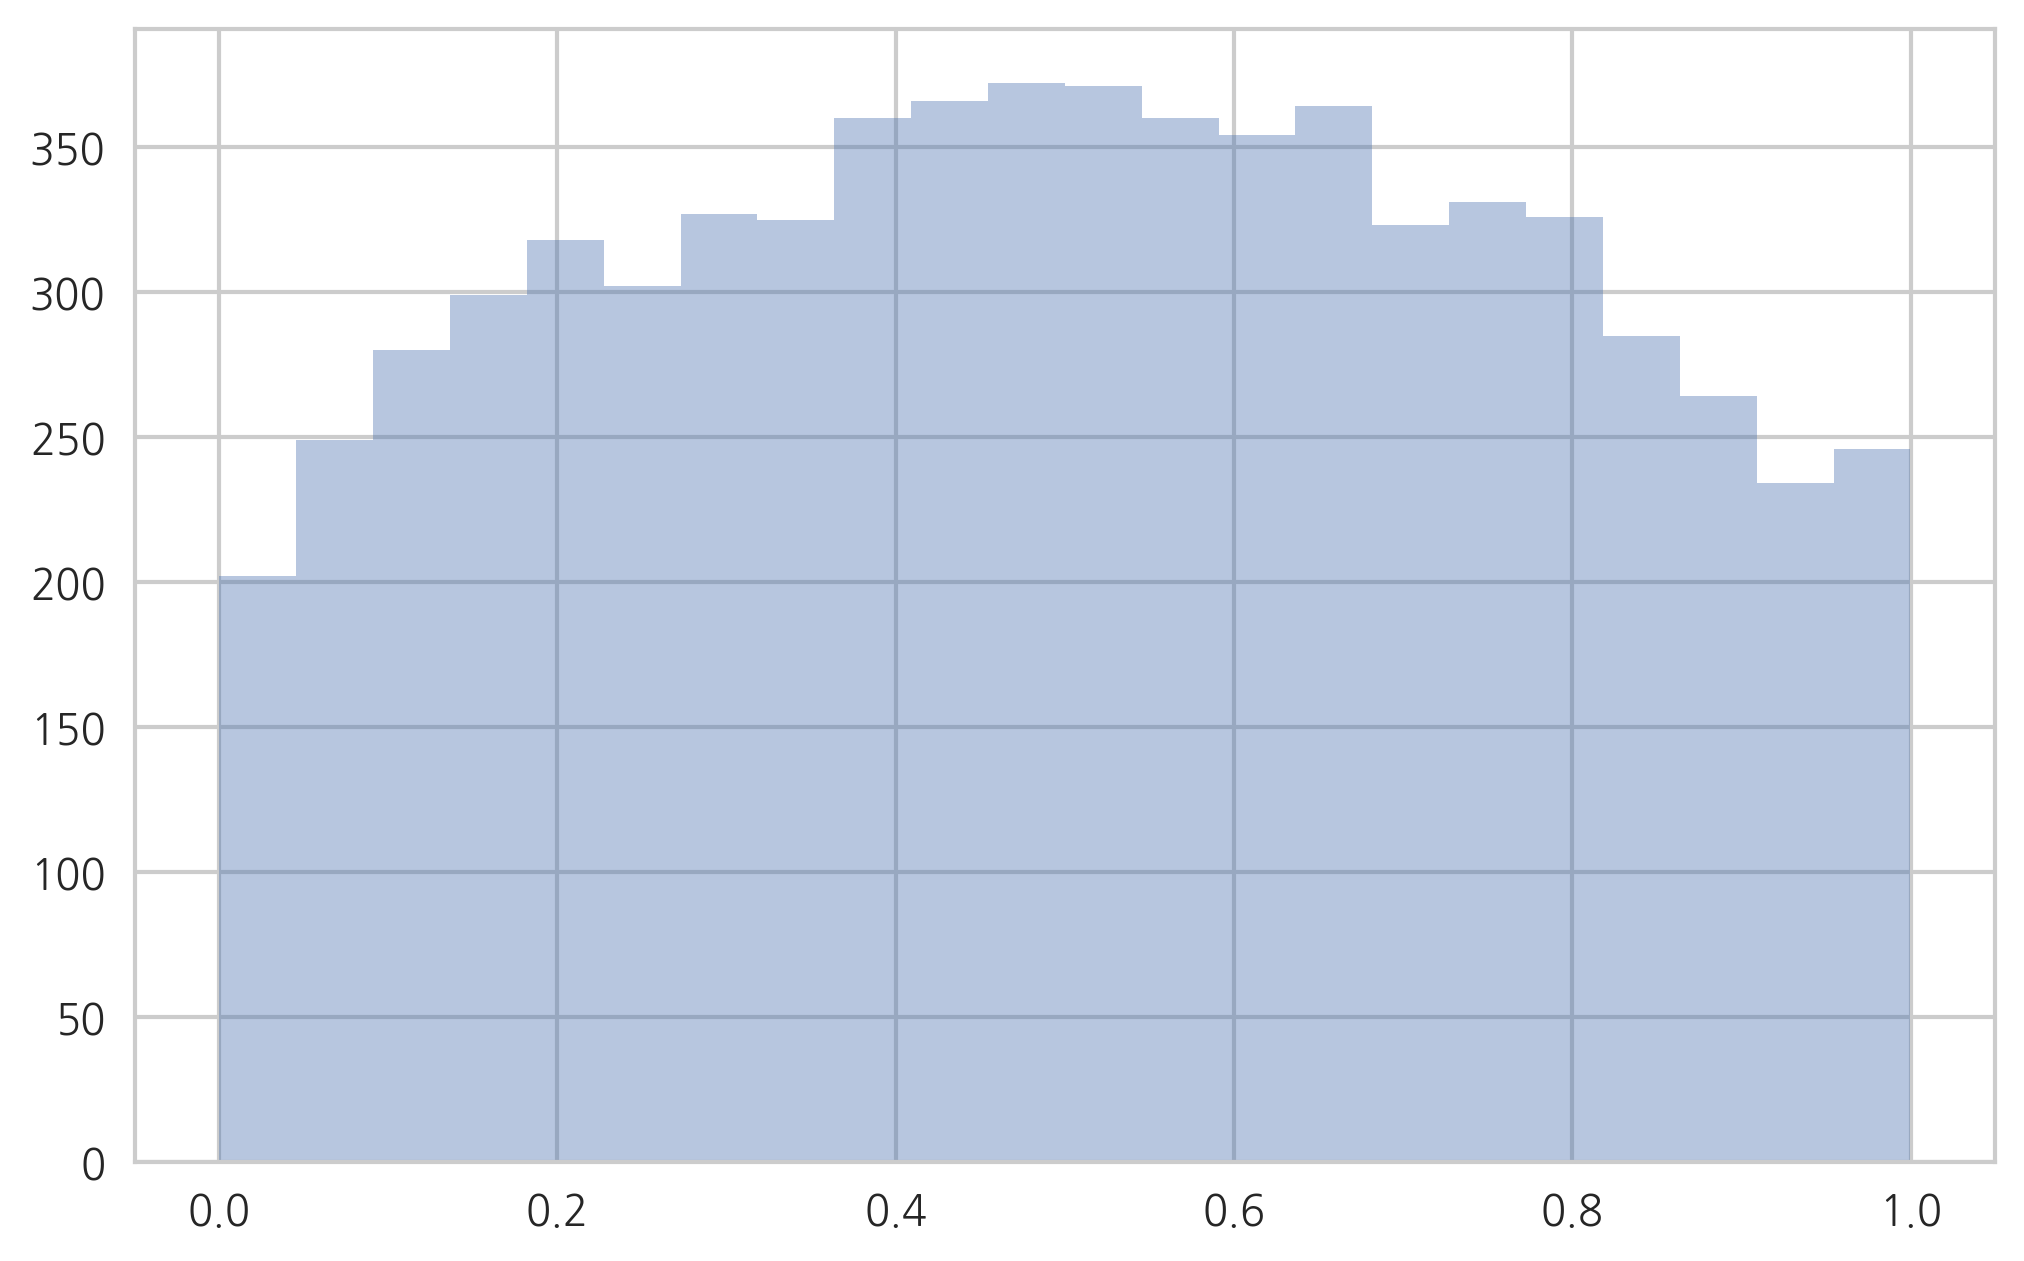

In [4]:
sns.distplot(x_q, kde=False)
plt.show()

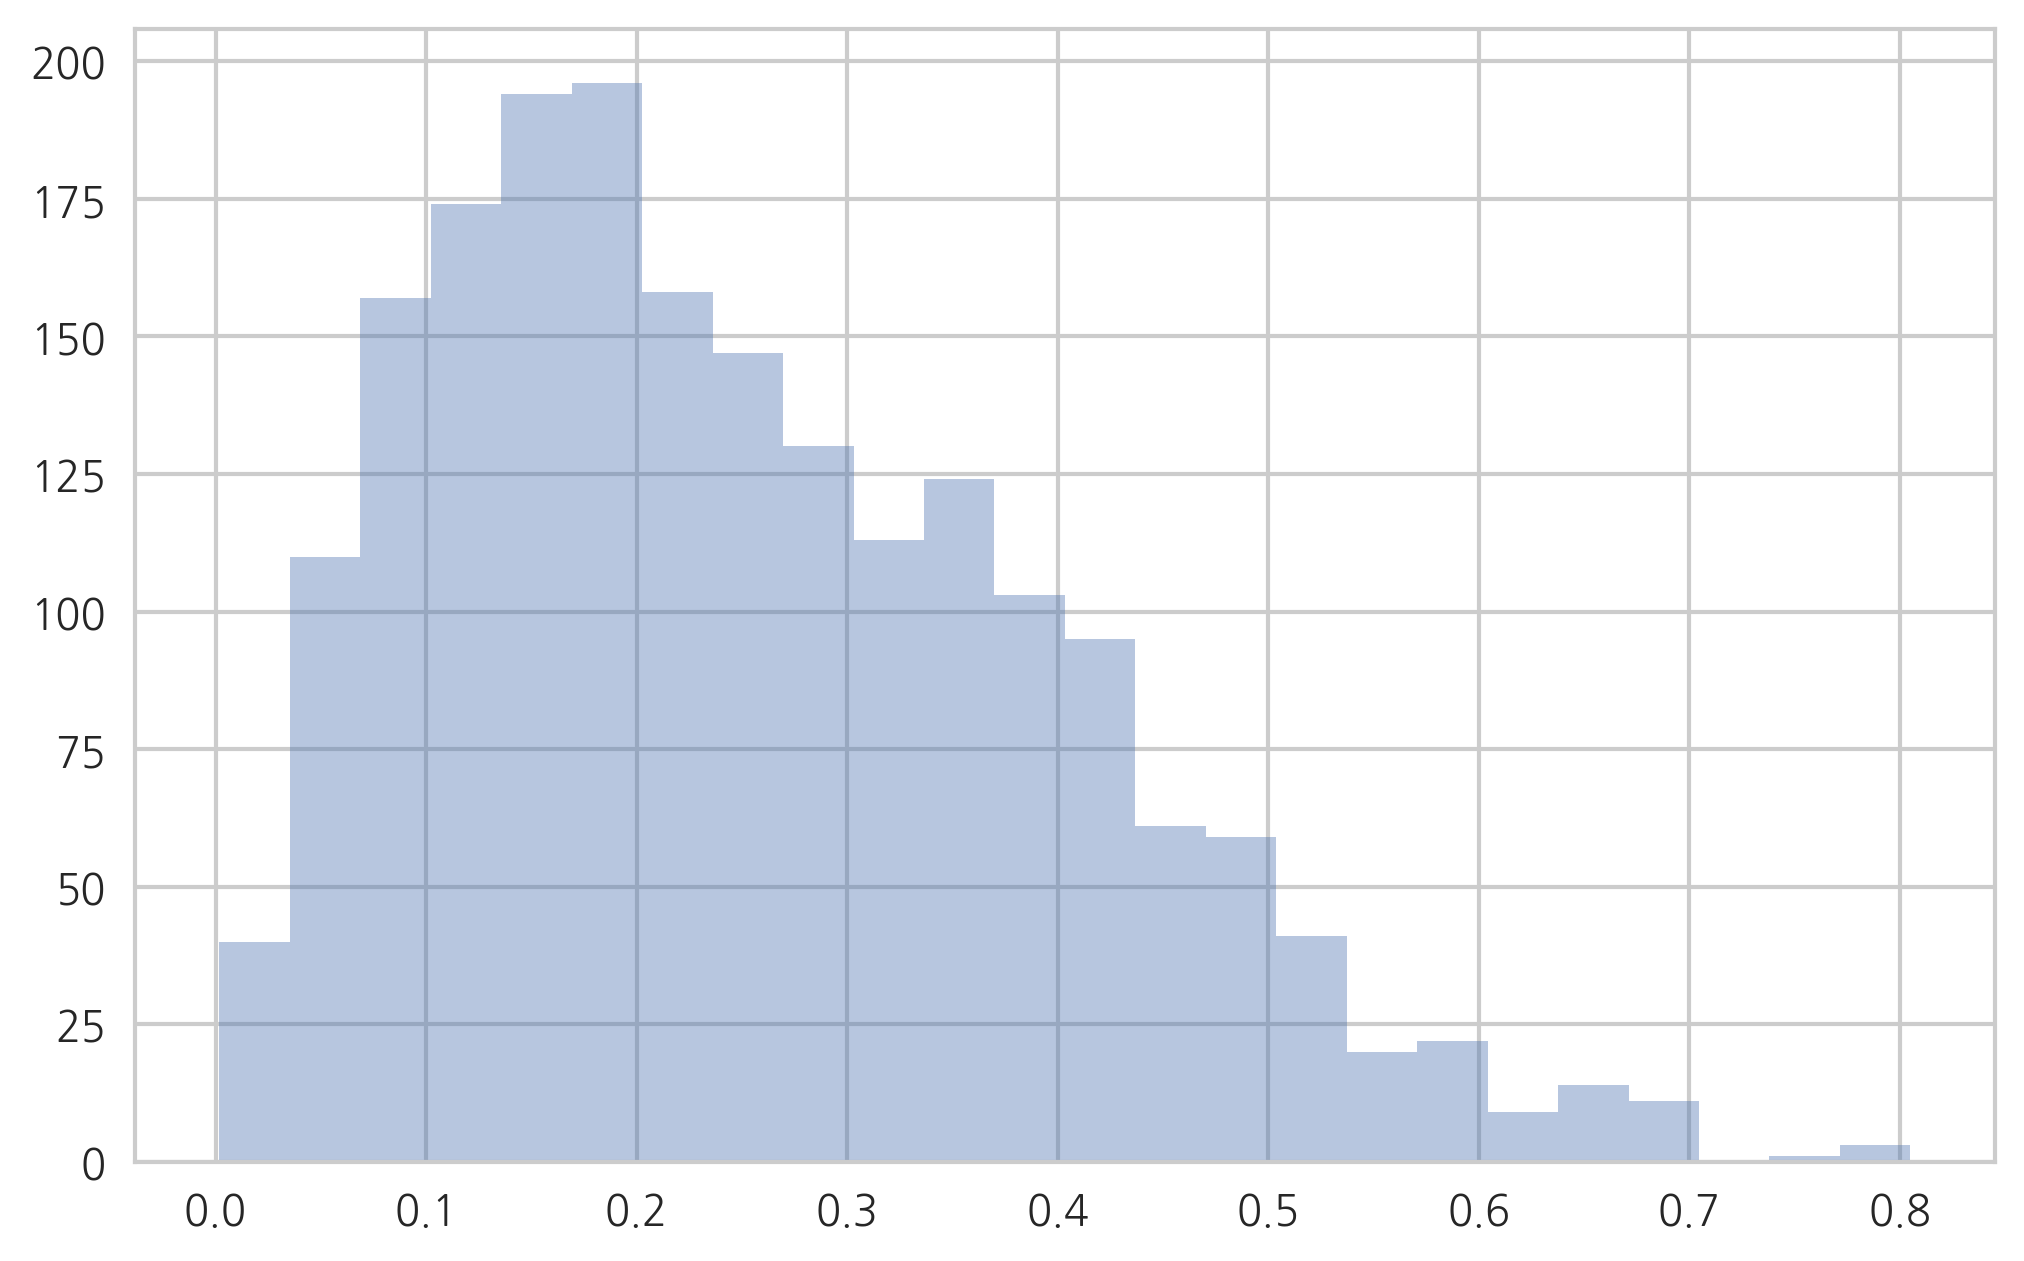

In [5]:
sns.distplot(x_p, kde=False)
plt.show() ## rejection sampling 된 모델 (내가 만들고자 하는 모델이 됨 )

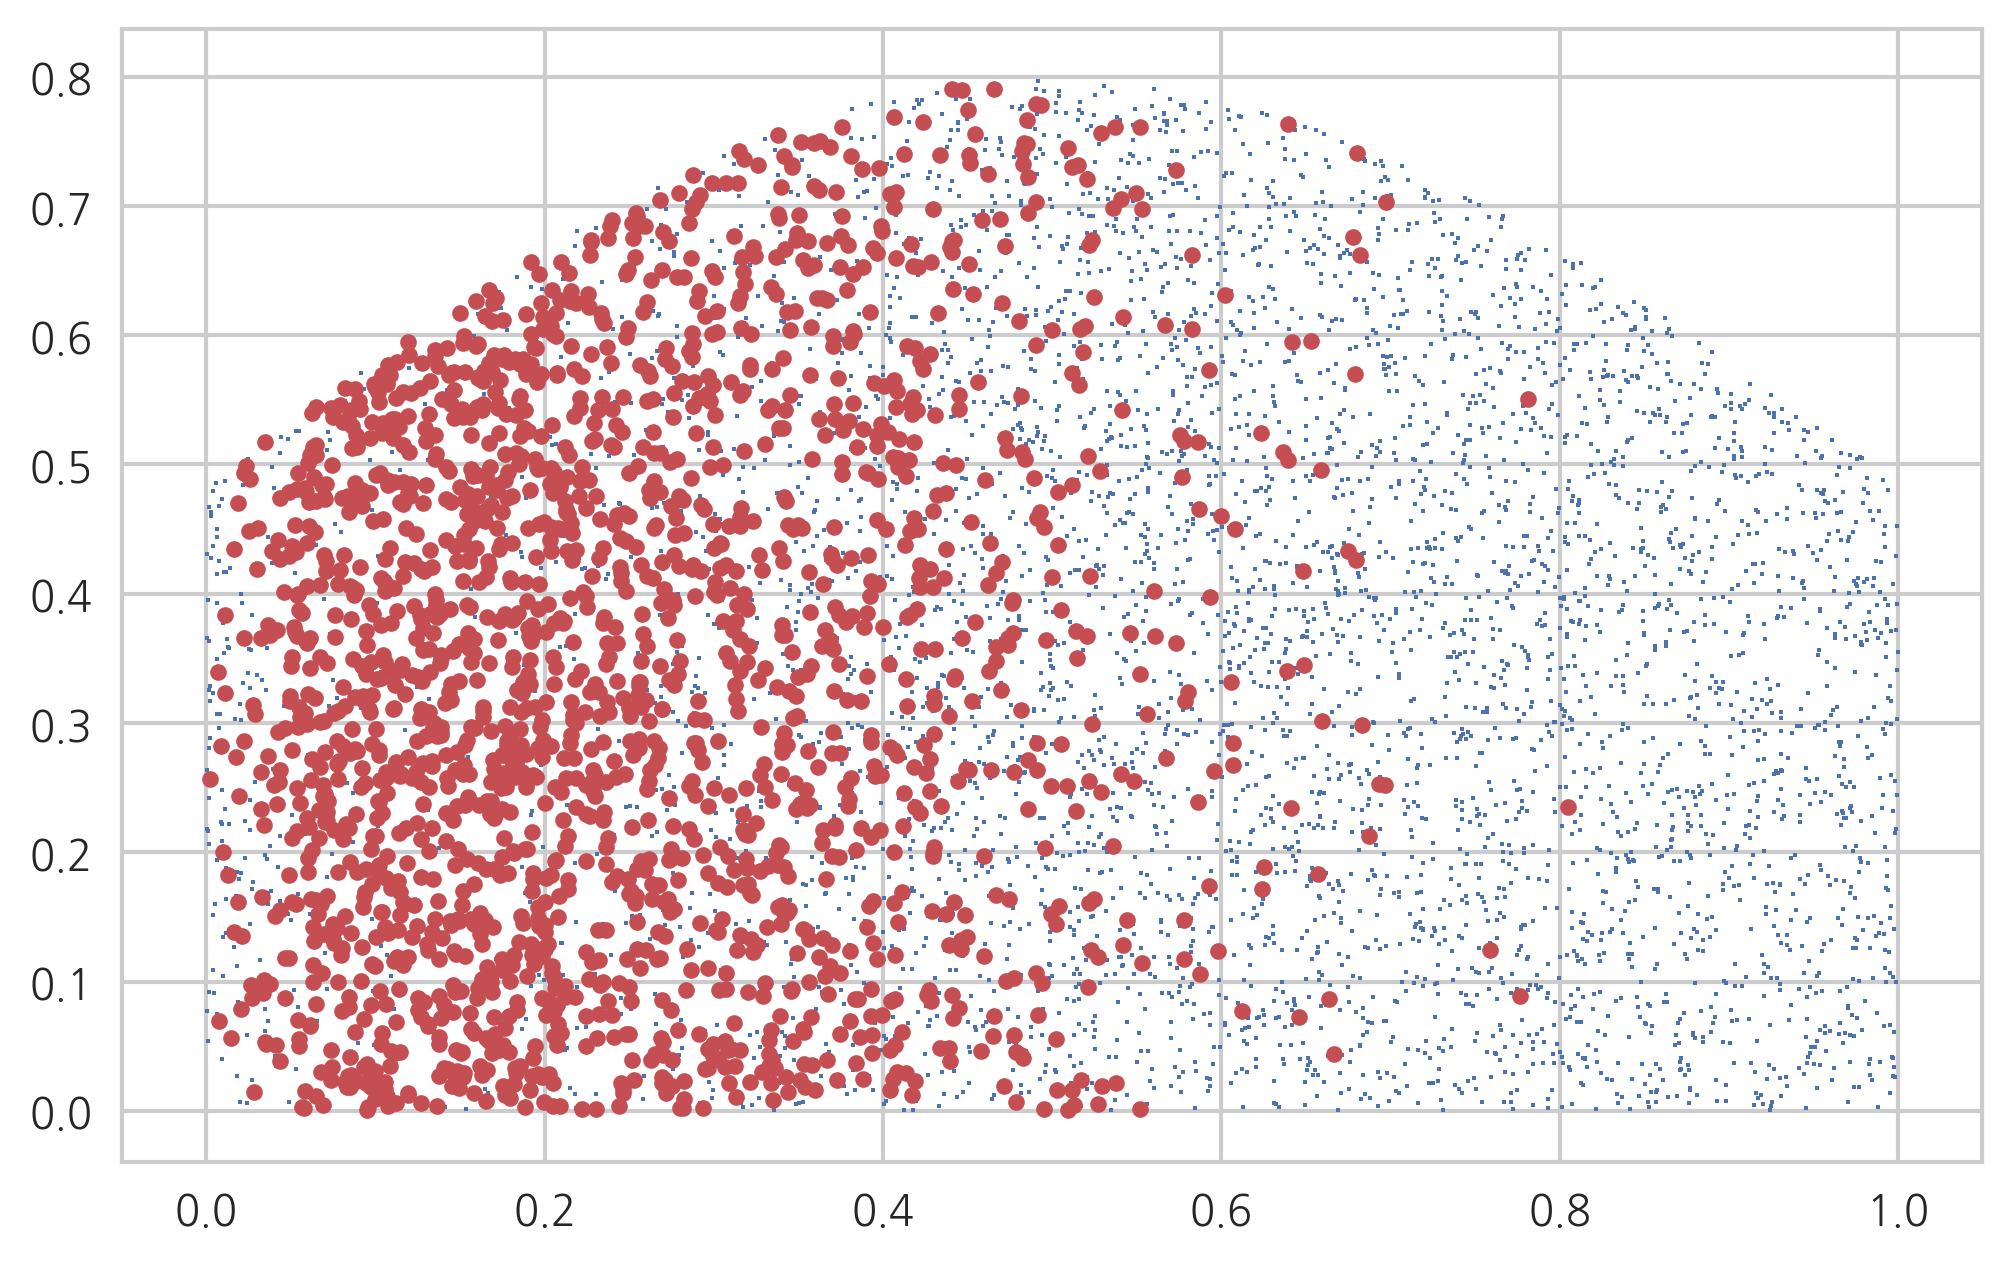

In [20]:
y = np.random.rand(len(x_q)) * rv_q.pdf(x_q)
plt.plot(x_q, y, 'bs', ms=1)
ids = coins < crits
plt.plot(x_q[ids], y[ids], 'ro', ms=4)
plt.show()
## 그리고 싶은 그래프의 밖의 범위 점의 개수를 최소화 하기 위해서 내가 그리고 싶은 그래프와(베타분포) 임의의 그래프(정규분포)의 크기가 비슷하고 차이가 적은것이 좋다. 
## 버리는 점들의 개수를 최소화 하기 위해서 (코스트를 줄이기 위해)

## 다차원의 시뮬레이션 경우 거의 껍데기에 점이 찍히는 현상이 발생하여 rejection 이 되는 점들이 많아짐
## 다차원에서는 차원이 늘어날수록 공간이 엄청 넓어져서 아무리 샘플링을 하여 점을 찍어도 그 다차원 공간의 일부분을 채우므로 목표한 값에 가까이 가지 못해 거의 다 버림, reject 됨  

## Expectation Approximation Using Sampling

$$ \text{E}[f(X)] = \int f(x)p(x)dx $$

$$ \text{E}[f(X)] \approx \dfrac{1}{N} \sum_{i=1}^N f(x_i) $$

샘플자체가 확률을 가지고있어서 두번째 공식에서는 P(x)가 없음

## Importance Sampling

$$
\begin{eqnarray}
\text{E}[f(X)] 
&=& \int f(x)p(x)dx  \\
&=& \int f(x)\dfrac{p(x)}{q(x)} q(x) dx  \\
&\approx & \dfrac{1}{N} \sum_{i=1}^N f(x_i)\dfrac{p(x_i)}{q(x_i)}  \\
\end{eqnarray}
$$

In [23]:
mean = a / (a + b) ## 베타분포의 기대값 공식
mean

0.25

In [28]:
np.mean(x_p) ## p값의 기대값

0.25317146797551493

In [42]:
np.random.seed(1)
x_q = rv_q.rvs(int(1e4))## 만개의 샘플링
np.mean(x_q * rv_p.pdf(x_q) / rv_q.pdf(x_q)) 
## importance 만큼 가중치를 줘서 나눈것임 ## 리소스 낭비 없음## 버리는 값이 없음 
## 가중치를 줘서 나누니깐 베타분포의 기대값과 거의 비슷한 목표값의 기대값을 가짐 

0.25016824587488934

In [43]:
len(x_p), len(x_q)

(1982, 10000)

## Conditional Probability and Markov Chain

$$ p(x^{(t + 1)}) = \sum_{x^{(t)}} p(x^{(t + 1)} \mid x^{(t)}) p(x^{(t)}) $$

* detailed balance 조건을 만족하면 특정한 분포로 수렴

수렴을 하여 내가 원하는 마코프 체인을 찾아냄 

## MCMC(Markov Chain Monte Carlo)

* Markov Chain의 최종 수렴 분포가 원하는 분포 $p(x)$가 되도록 하는  Markov Chain을 만든다.

## Metropolis-Hastings Sampling( MCMC의 종류중 하나) 

1. (step 0) $x^{(0)}$ 생성
1. (step 1) 샘플링 가능한 $q(x^{\ast} \mid x^{(t)})$ 분포로 $x^{\ast}$ 생성 (주로 가우시안 정규분포)
1. (step 2) 다음 확률로 $x^{(t+1)} = x^{\ast}$ 선택, 선택되지 않으면 $x^{(t+1)} = x^{(t)}$
$$ \min \left( 1, \dfrac{p(x^{\ast}) q(x^{(t)} \mid x^{\ast})}{p(x^{(t)}) q(x^{\ast} \mid x^{(t)})} \right)$$
1. 충분한 수의 샘플이 모일때까지 (step 1) ~ (step 2) 반복 (importance sampling에서 나온 샘플들) 

In [ ]:
## 빨간색 :reject , 연두색: accepted 


<img src="https://datascienceschool.net/upfiles/02bc071a711d429c94582e30b5d2597f.png">

## Hamiltonian Monte Carlo

* gradient 정보를 사용하여 리젝트 확률 감소 (Metropolis-Hastings Sampling 기본 + gradient) 

## PyMC3

* MCMC Bayesian in Python
* Theano backend (Theano 기반: 수많은 샘플링을 해야하기때문에 많은 계산량을 요구) 

In [4]:
##스타트업 파일

from scipy.stats import norm
import numpy as np
import scipy as sp
from pandas.core import datetools 
import pandas as pd
import statsmodels.api as sm ## R 패키지에서 불러온것, 샘플데이터 옮겨쓸수 있는 프로젝트 있음. 회귀분석에 유용 
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk 

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

## Anaconda: localhost:8890
## python3: localhost:8888

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [5]:
import pymc3 as pm

In [6]:
cov = np.array([[1., 1.5], [1.5, 4]])## 공분산 행렬
mu = np.array([1, -1]) ## 평균

In [7]:
with pm.Model() as model: ## model이 fuction관리 
    x = pm.MvNormal('x', mu=mu, cov=cov, shape=(1, 2))## 'x'는 심볼이름
    step = pm.Metropolis()## Metropolis 모델사용
    trace = pm.sample(5000, step) ## 샘플링 5천번 

100%|████████████████████████████████████████████████████████████████████████████| 5500/5500 [00:03<00:00, 1587.46it/s]


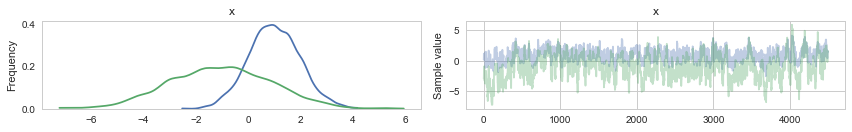

In [8]:
pm.traceplot(trace, skip_first=500) ## 앞의 5백개버리고 나머지 4500개 쓰기 
plt.show()## Hamiltonian Monte Carlo 는 gradient를 사용하기 때문에 안정적인 그래프로 수렴하는데 시간이 걸림 (burn in 이라고 함)

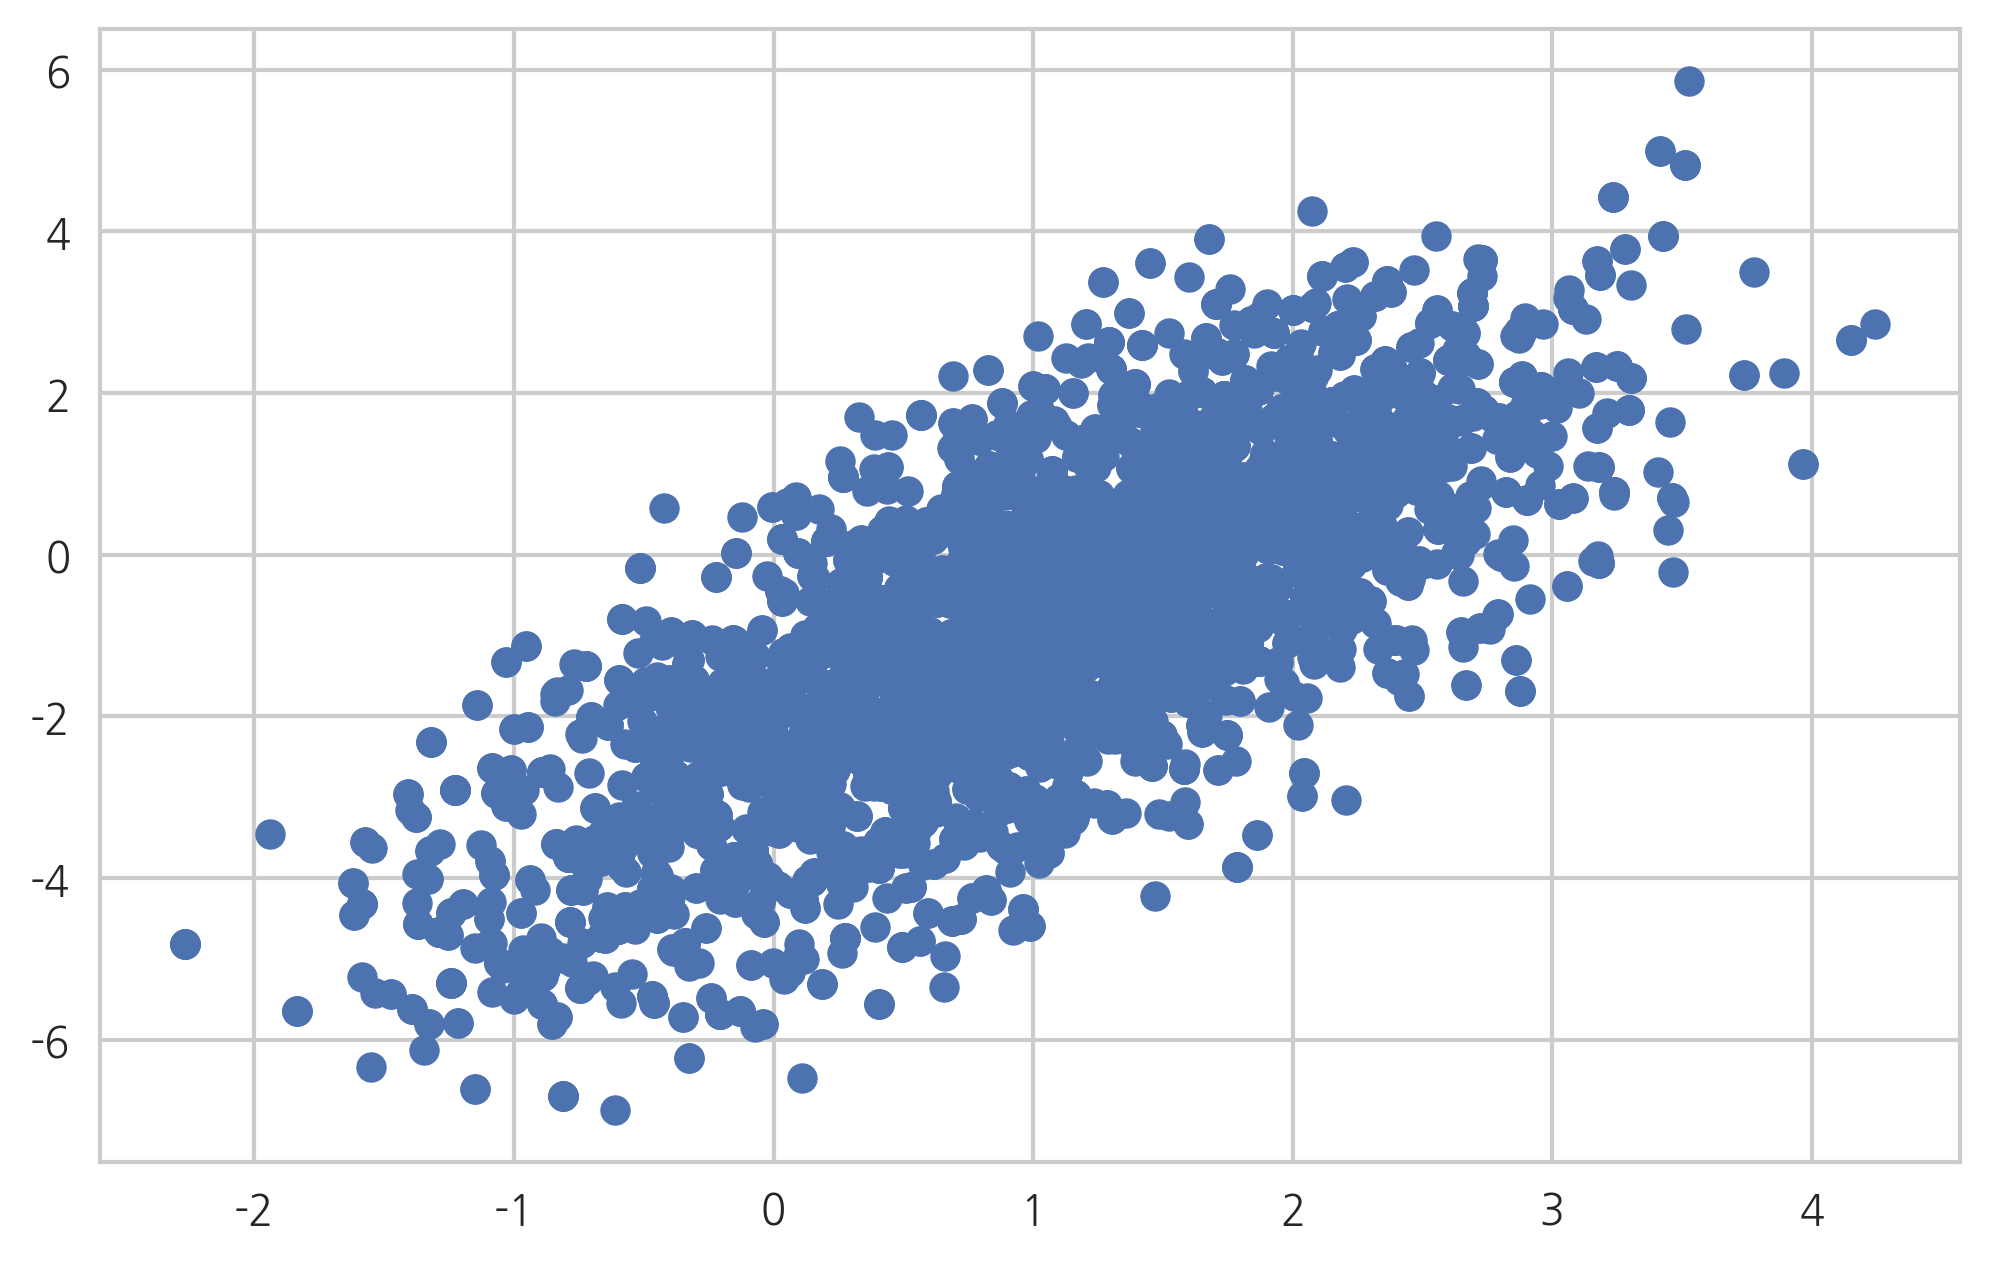

In [131]:
plt.scatter(trace['x'][500:, 0, 0], trace['x'][500:, 0, 1])
plt.show()

## Bayesian Estimation using MCMC

$$ P(\theta \mid x_{1},\ldots,x_{N}) \propto P(x_{1},\ldots,x_{N} \mid \theta)  P(\theta) $$


* $ P(\theta) $: Beta
* $ P(x_{1},\ldots,x_{N} \mid \theta) $: Binomial

In [10]:
theta0 = 0.7 ## 모수가 0.7로 됨
np.random.seed(0)
x_data1 = sp.stats.bernoulli(theta0).rvs(10)
x_data1

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [11]:
with pm.Model() as model:
    theta = pm.Beta('theta', alpha=1, beta=1) ## 베타분포 심볼'theta'
    x = pm.Bernoulli('x', p=theta, observed=x_data1)## 베르누이분포 심볼'x'
    start = pm.find_MAP() ## 사후확률 (posterier)
    step = pm.NUTS() ## 헤밀토니안 몬테카를로 (다차원에 좋음)
    trace1 = pm.sample(1000, step=step, start=start)

logp = -6.9315, ||grad|| = 2: 100%|█████████████████████████████████████████████████████| 6/6 [00:00<00:00, 384.40it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:05<00:00, 281.41it/s]


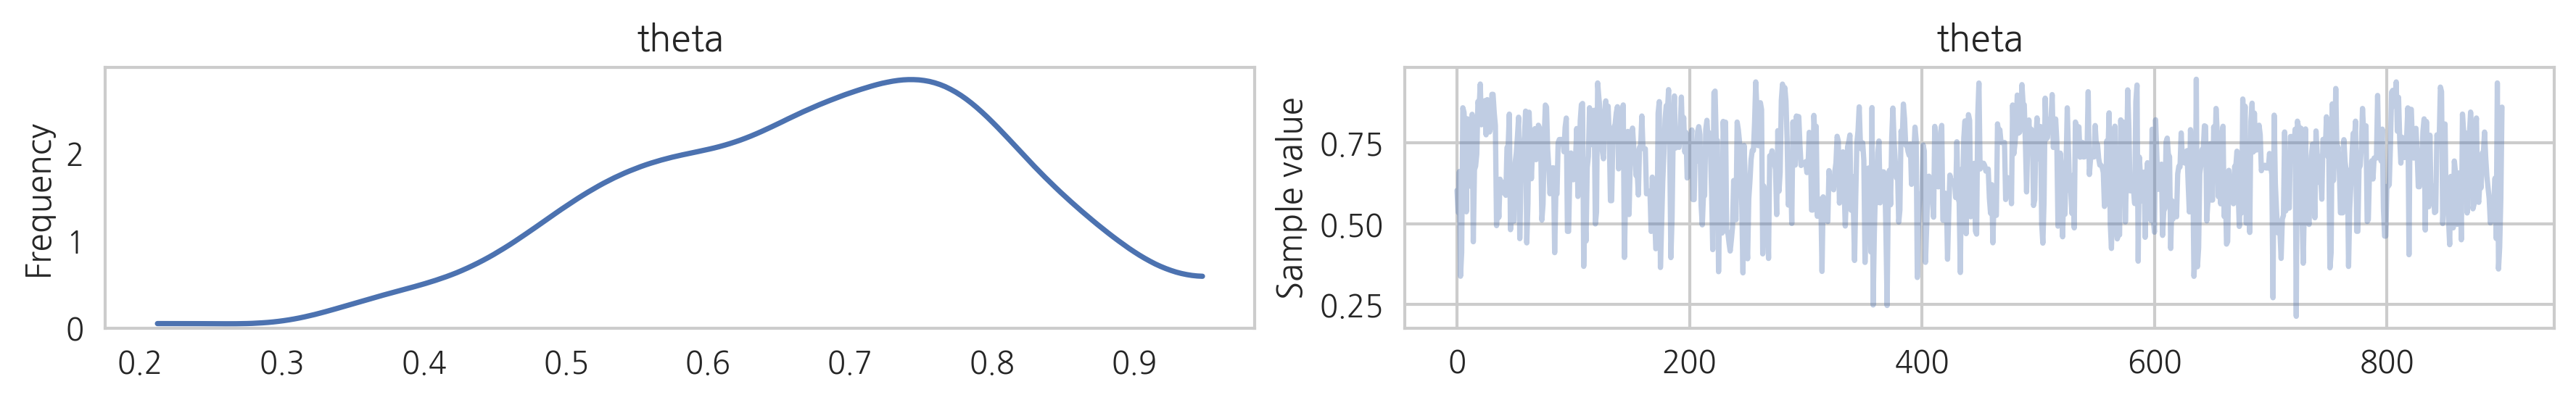

In [166]:
pm.traceplot(trace1, skip_first=100); ## 두번째 그래프는 샘플 개수가 늘어남에 따라 theta가 있는곳을 측정

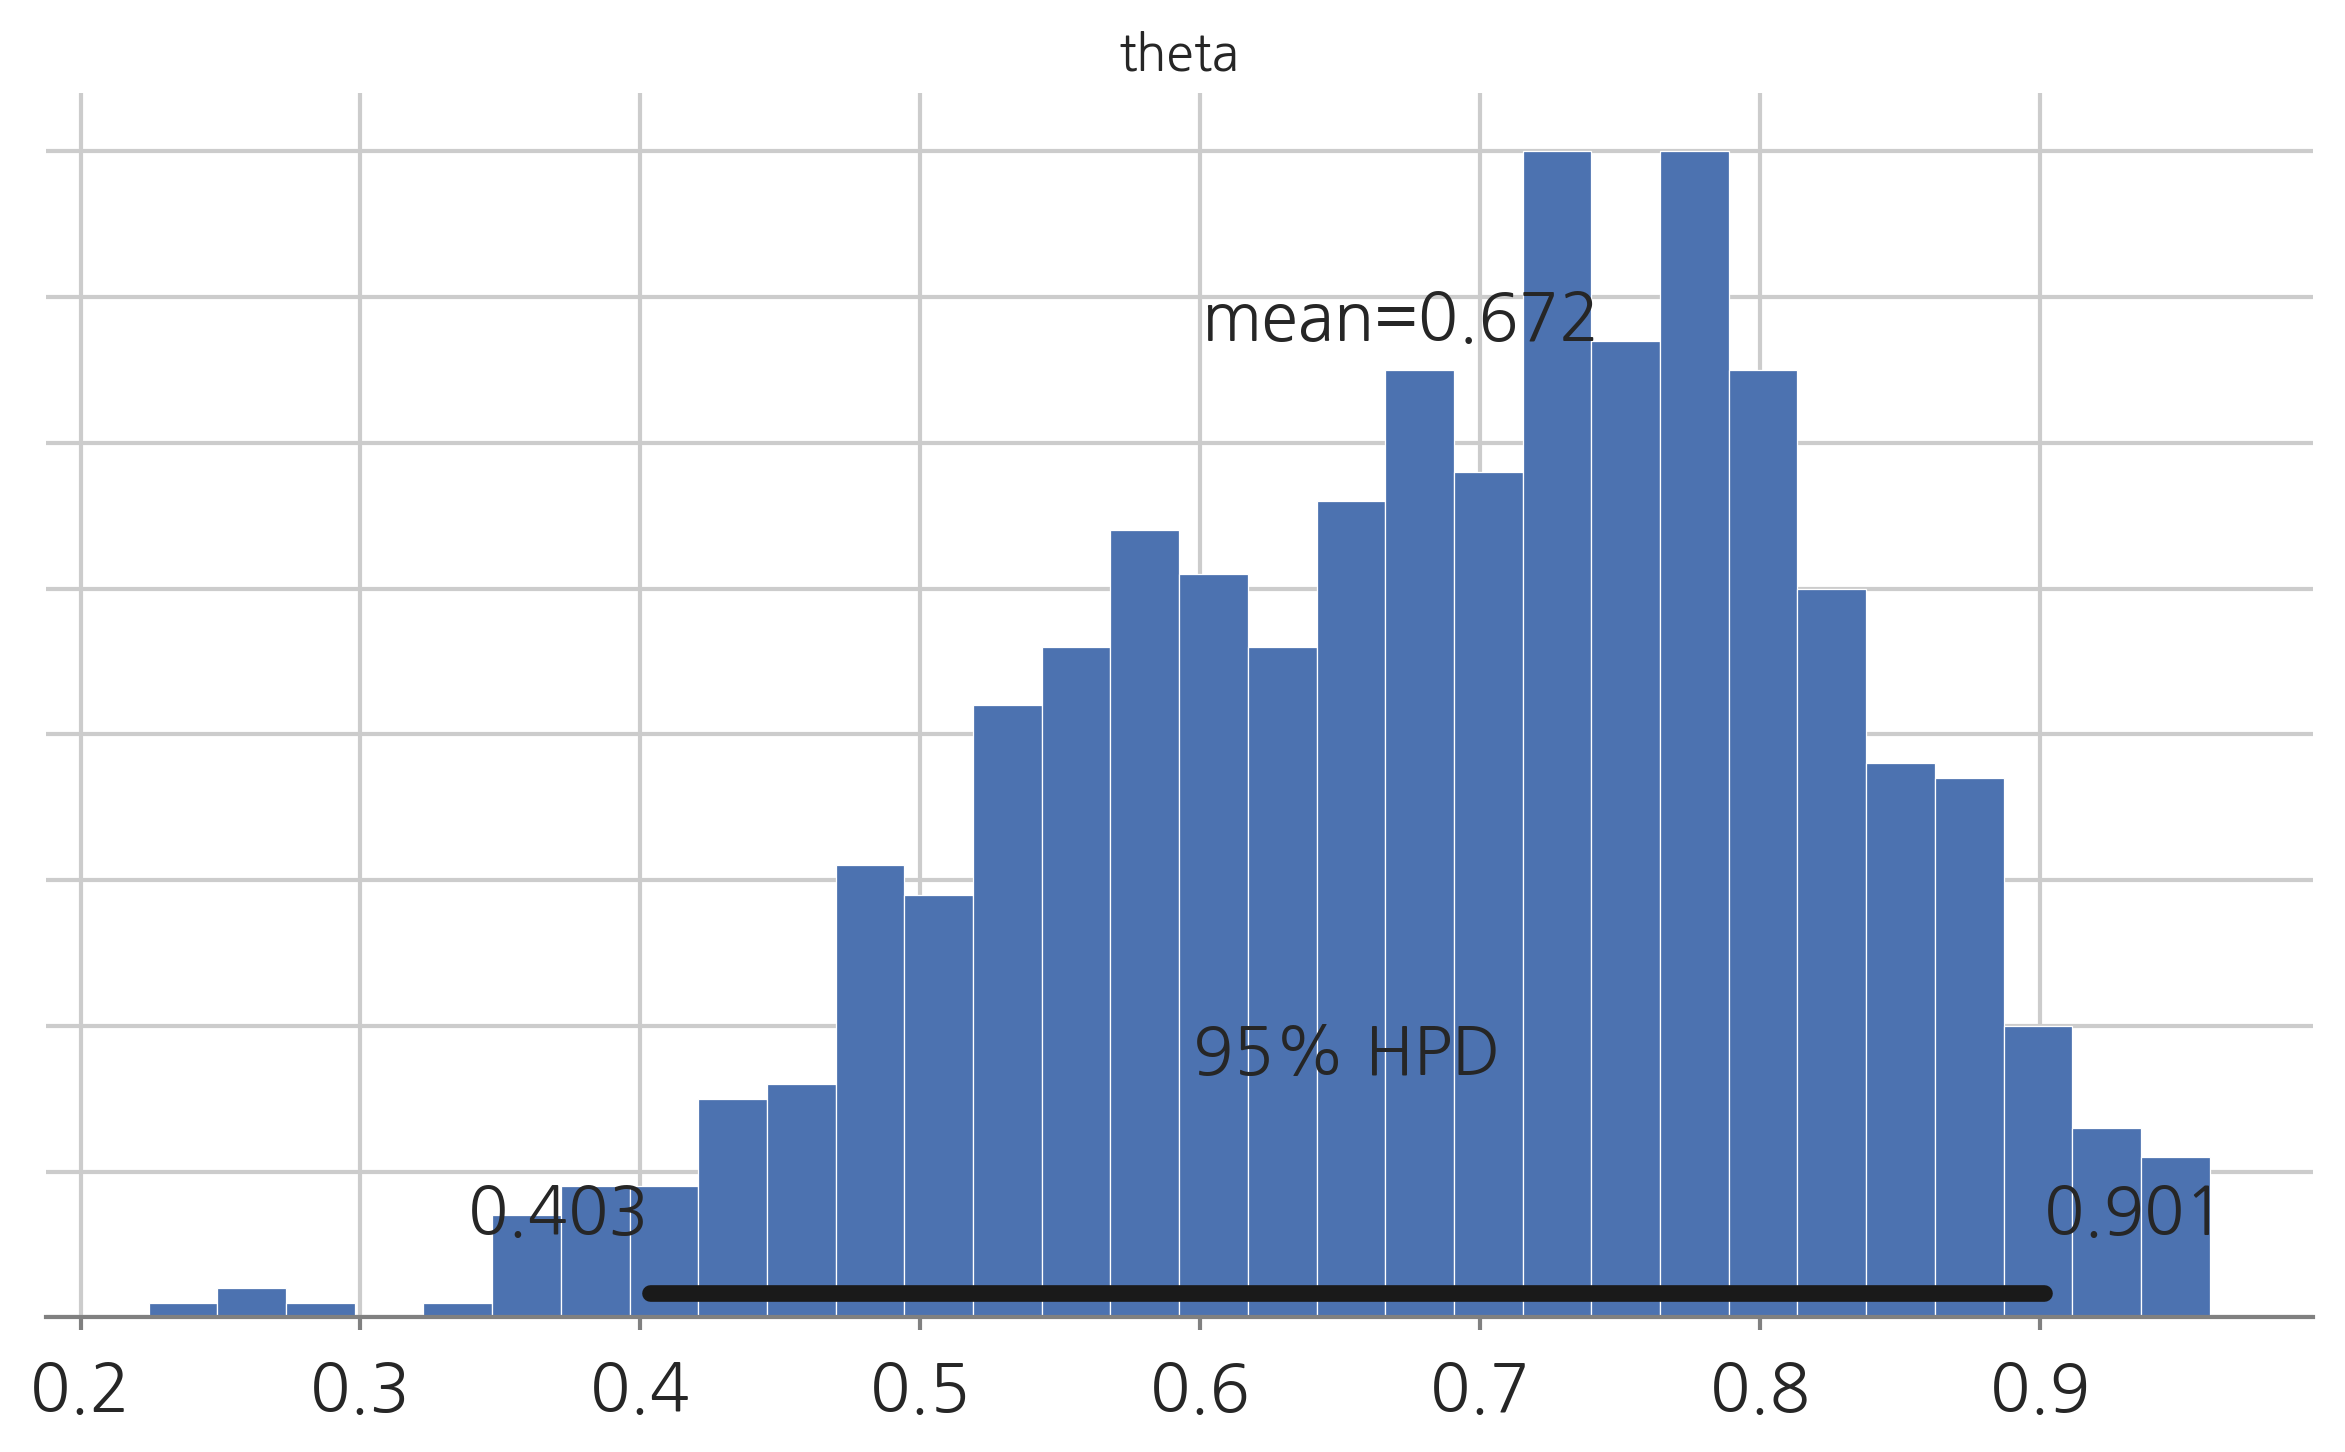

In [189]:
pm.plot_posterior(trace1)
plt.show() ## HPD: 0.4~0.9에 있을확률이 95프로 

In [187]:
pm.summary(trace1) 
## 평균:0.672 분산:0.133 기각역:0.006, 95프로 신뢰구간 [0.403, 0.901]


theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.672            0.133            0.006            [0.403, 0.901]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.392          0.575          0.684          0.771          0.899



In [167]:
print(pm.df_summary(trace1))

          mean        sd  mc_error   hpd_2.5  hpd_97.5
theta  0.67156  0.133365  0.006041  0.403376  0.901421


In [13]:
np.random.seed(0)
x_data2 = sp.stats.bernoulli(theta0).rvs(300)

In [14]:
with pm.Model() as model:
    theta = pm.Beta('theta', alpha=1, beta=1)# 베타 모수
    x = pm.Bernoulli('x', p=theta, observed=x_data2) ## 베르누이 분포 
    start = pm.find_MAP()
    step = pm.NUTS()
    trace2 = pm.sample(1000, step=step, start=start)

logp = -207.94, ||grad|| = 65: 100%|████████████████████████████████████████████████████| 7/7 [00:00<00:00, 311.76it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:12<00:00, 122.35it/s]


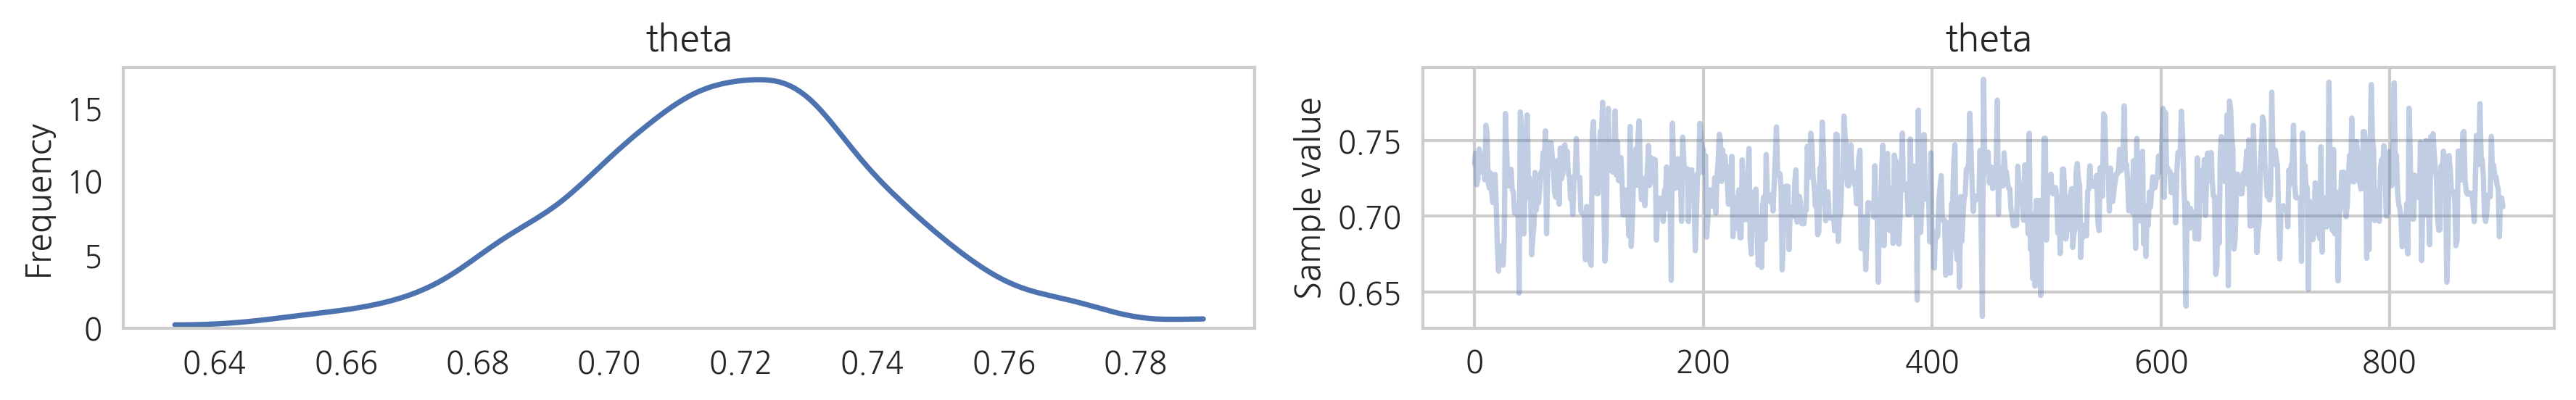

In [179]:
pm.traceplot(trace2, skip_first=100);

In [180]:
print(pm.df_summary(trace2))

          mean        sd  mc_error   hpd_2.5  hpd_97.5
theta  0.71749  0.024576  0.001233  0.673357  0.771205


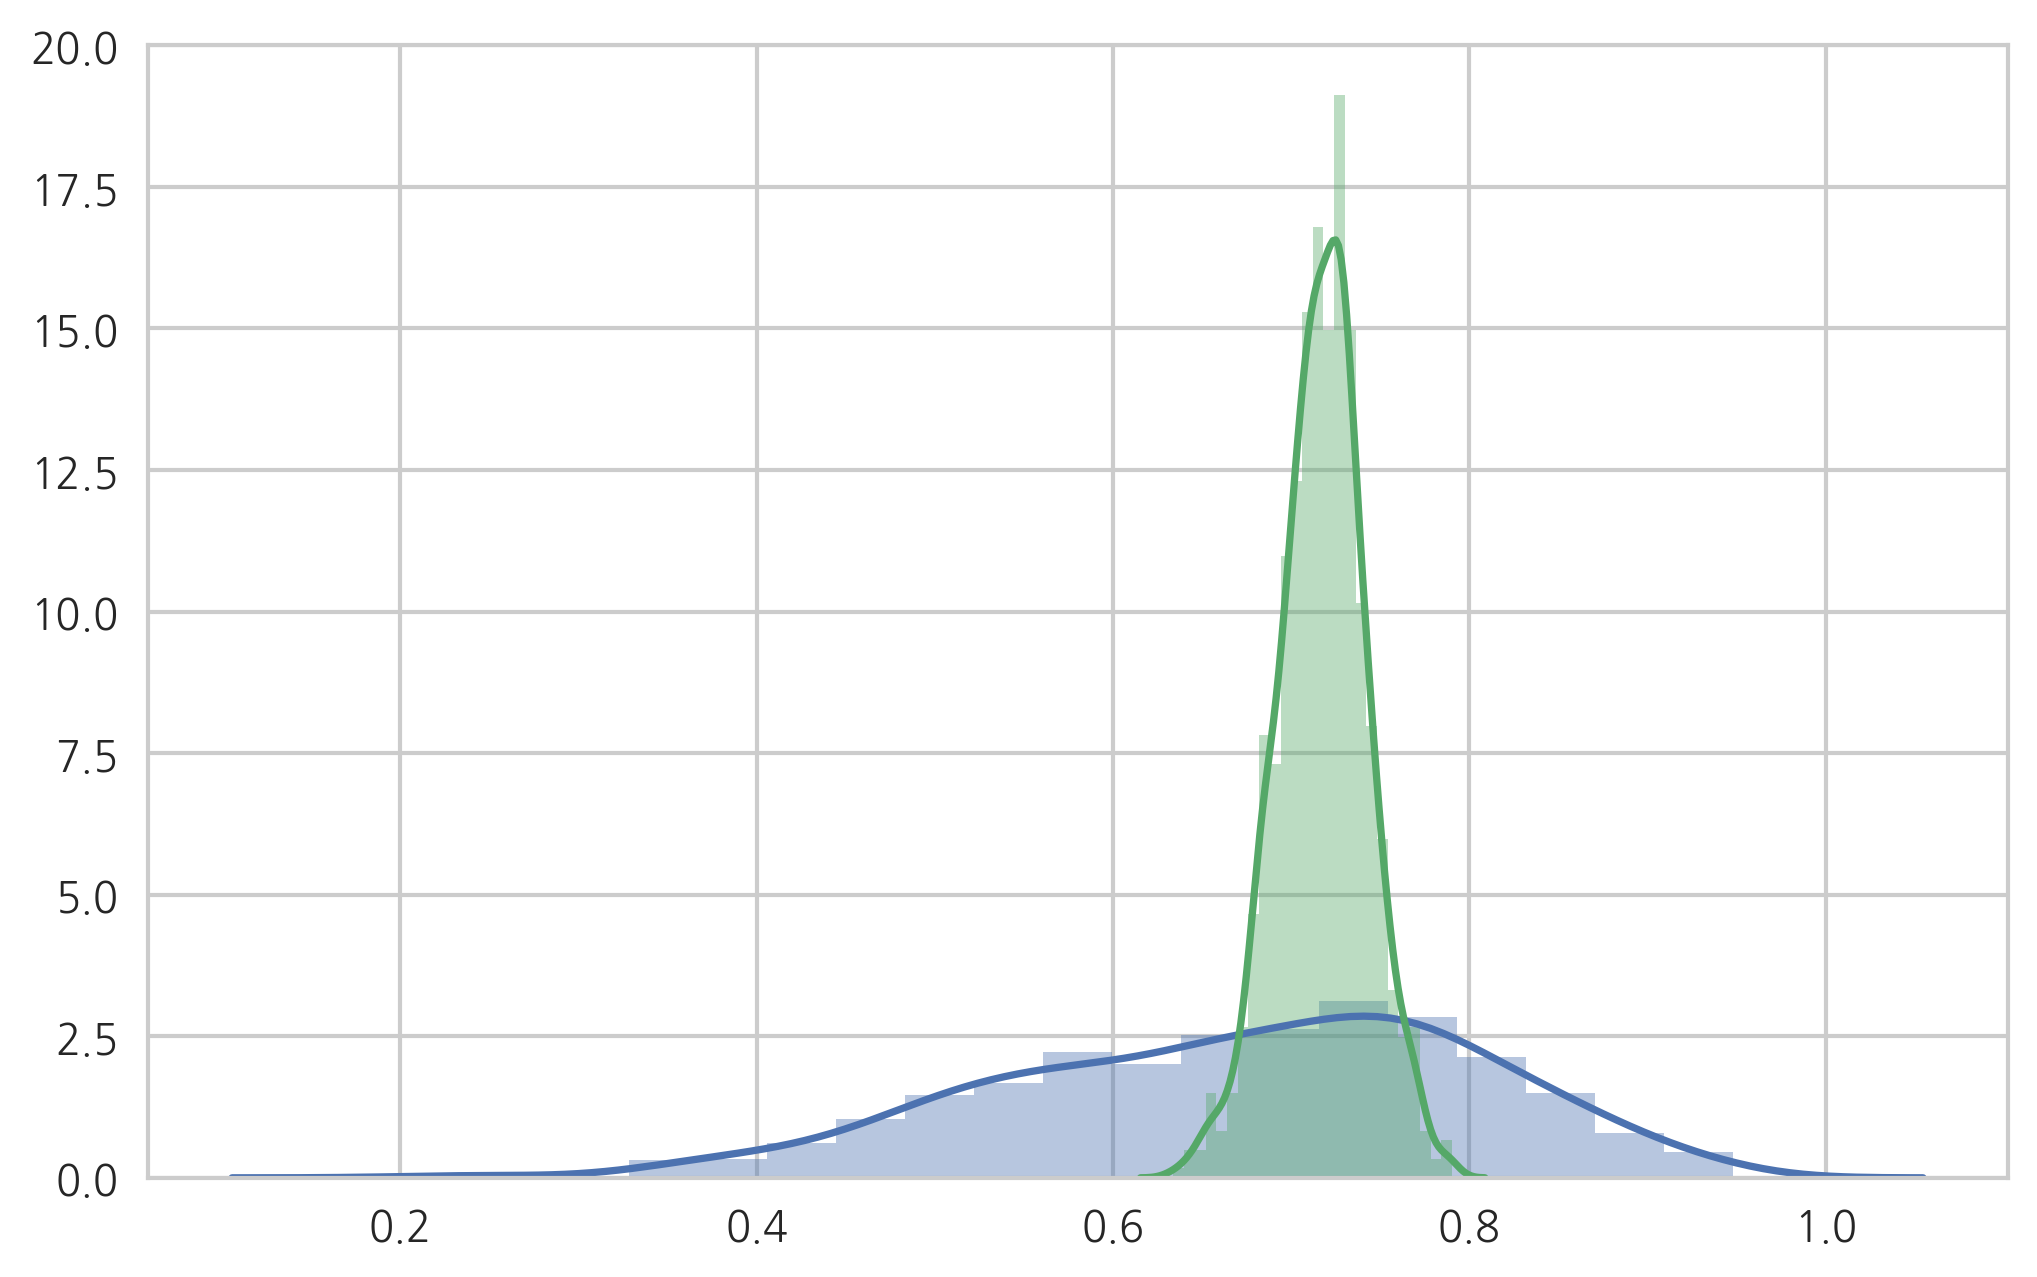

In [185]:
sns.distplot(trace1['theta'])## 모수의 분포
sns.distplot(trace2['theta'])## 모수의 분포
plt.ylim(0, 20)
plt.show()

## Bayesian Linear Regression using MCMC (베이지안 선형회귀)

In [16]:
from sklearn.datasets import make_regression

## 실제 값들 

x, y_data, coef = make_regression(n_samples=100, n_features=1, bias=0, noise=20, coef=True, random_state=1)
x = x.flatten()
coef ## 가중치 계수 

array(80.71051956187792)

In [17]:
# 레버리지가 높은 가상의 데이터를 추가
data_100 = (4, 300)
data_101 = (3, -100) ## 실제값들에 아웃라이어 2개 추가 총 100+2 개의 샘플링
x = np.hstack([x, [data_100[0], data_101[0]]])
y_data = np.hstack([y_data, [data_100[1], data_101[1]]])

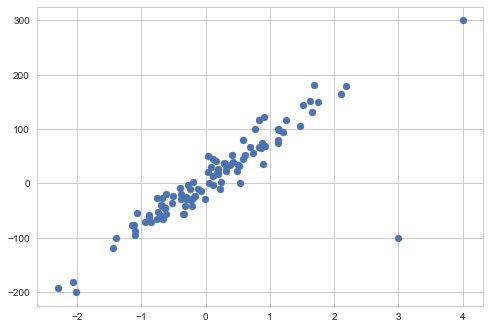

In [18]:
plt.scatter(x, y_data)
plt.show()

In [20]:
with pm.Model() as m: ## 모수측정
    w = pm.Normal('w', mu=0, sd=50) ## 가중치 또는 x의 계수 를 정규분포로 넣음 (sd=표준편차 )
    b = pm.Normal('b', mu=0, sd=50) ## 절편값을 정규분포로 넣음
    mu = pm.Deterministic('mu', w * x+b)
    esd = pm.HalfCauchy('esd', 5)
    y = pm.Normal('y', mu=mu, sd=esd, observed=y_data) ## 정규분포 ## (residual)이노베이션의 편차
    
    start = pm.find_MAP()
    step = pm.NUTS()
    trace1 = pm.sample(10000, step=step, start=start)

logp = -531.74, ||grad|| = 11.351: 100%|███████████████████████████████████████████████| 37/37 [00:00<00:00, 71.71it/s]
100%|████████████████████████████████████████████████████████████████████████████| 10500/10500 [09:18<00:00, 18.79it/s]


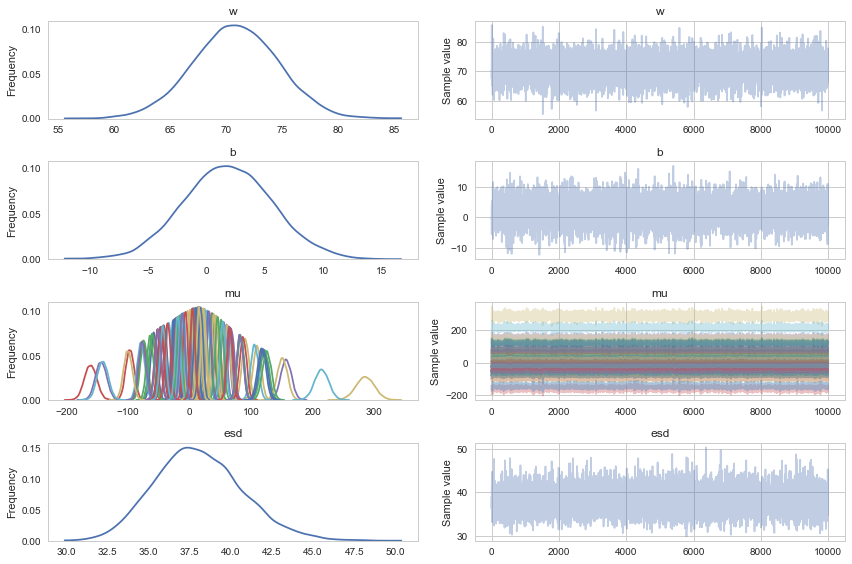

In [21]:
pm.traceplot(trace1)
plt.show()

In [304]:
print(pm.df_summary(trace1))
## w 의 값은 71.100이 나옴 (아웃라이어 때문에 계수가 적게 나옴)

               mean         sd  mc_error     hpd_2.5    hpd_97.5
w         71.100505   3.697957  0.028402   63.870963   78.280995
b          0.257092  49.483251  0.411805  -97.246198   96.258858
mu__0    -43.496190   2.262249  0.017375  -47.888901  -39.073471
mu__1    -17.730360   0.922161  0.007083  -19.520961  -15.927526
mu__2     34.733887   1.806519  0.013875   31.202125   38.241687
mu__3     54.179380   2.817885  0.021643   48.670388   59.650993
mu__4    108.059743   5.620218  0.043166   97.072164  118.972773
mu__5     26.844976   1.396215  0.010724   24.115363   29.556069
mu__6     36.469569   1.896793  0.014568   32.761322   40.152657
mu__7    -47.725939   2.482240  0.019065  -52.545815  -42.873137
mu__8    -99.291595   5.164184  0.039663 -109.319123  -89.195566
mu__9     22.441804   1.167205  0.008965   20.159908   24.708218
mu__10   -45.290712   2.355583  0.018092  -49.864653  -40.685526
mu__11   -28.209376   1.467178  0.011269  -31.058261  -25.341030
mu__12   -78.254579   4.0

In [305]:
model = sm.OLS.from_formula('y ~ x', data=pd.DataFrame({'x': x, 'y': y_data}))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     360.9
Date:                Fri, 24 Nov 2017   Prob (F-statistic):           5.92e-35
Time:                        13:20:19   Log-Likelihood:                -514.53
No. Observations:                 102   AIC:                             1033.
Df Residuals:                     100   BIC:                             1038.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7063      3.785      0.451      0.6

## Robust Bayesian Regression

In [306]:
with pm.Model() as m:
    w = pm.Normal('w', mu=0, sd=50)
    b = pm.Normal('b', mu=0, sd=50)
    mu = pm.Deterministic('mu', w * x)
    esd = pm.HalfCauchy('esd', 5)
    y = pm.StudentT('y', mu=mu, sd=esd, nu=3, observed=y_data) ## 확률분포가 student t분포 
    
    start = pm.find_MAP()
    step = pm.NUTS()
    trace2 = pm.sample(10000, step=step, start=start)

logp = -469.42, ||grad|| = 0.019358: 100%|██████████| 34/34 [00:00<00:00, 1413.64it/s]  
100%|██████████| 10500/10500 [00:09<00:00, 1058.57it/s]


In [307]:
print(pm.df_summary(trace2)) 
## 가중치 w는 80으로 맨위의 만든 수식과 거의 같은 값을 가짐 
## 아웃라이어가 있어도 student t분포를 따르므로 모수값은 거의 현실에 가깝에 나옴 
## student t분포는 꼬리가 긴 분포 (아웃라이어가 있음): 즉, 분포의 평균값에 아웃라이어가 영향을 많이 미치지 않고 모수값을 실제값에 잘 찾아낼수 있음 

               mean         sd  mc_error     hpd_2.5    hpd_97.5
w         80.083707   1.859189  0.016059   76.463698   83.802998
b          0.375234  50.447335  0.426138  -97.699196   98.060790
mu__0    -48.991721   1.137371  0.009824  -51.267022  -46.777157
mu__1    -19.970504   0.463627  0.004005  -20.897985  -19.067781
mu__2     39.122344   0.908247  0.007845   37.353904   40.939285
mu__3     61.024680   1.416723  0.012237   58.266193   63.858822
mu__4    121.712564   2.825626  0.024407  116.210814  127.365206
mu__5     30.236707   0.701962  0.006063   28.869923   31.640977
mu__6     41.077321   0.953633  0.008237   39.220511   42.985057
mu__7    -53.755878   1.247973  0.010780  -56.252438  -51.325961
mu__8   -111.836603   2.596350  0.022427 -117.030580 -106.781274
mu__9     25.277216   0.586825  0.005069   24.134615   26.451155
mu__10   -51.012972   1.184295  0.010230  -53.382145  -48.707043
mu__11   -31.773493   0.737640  0.006372  -33.249135  -30.337242
mu__12   -88.141663   2.0

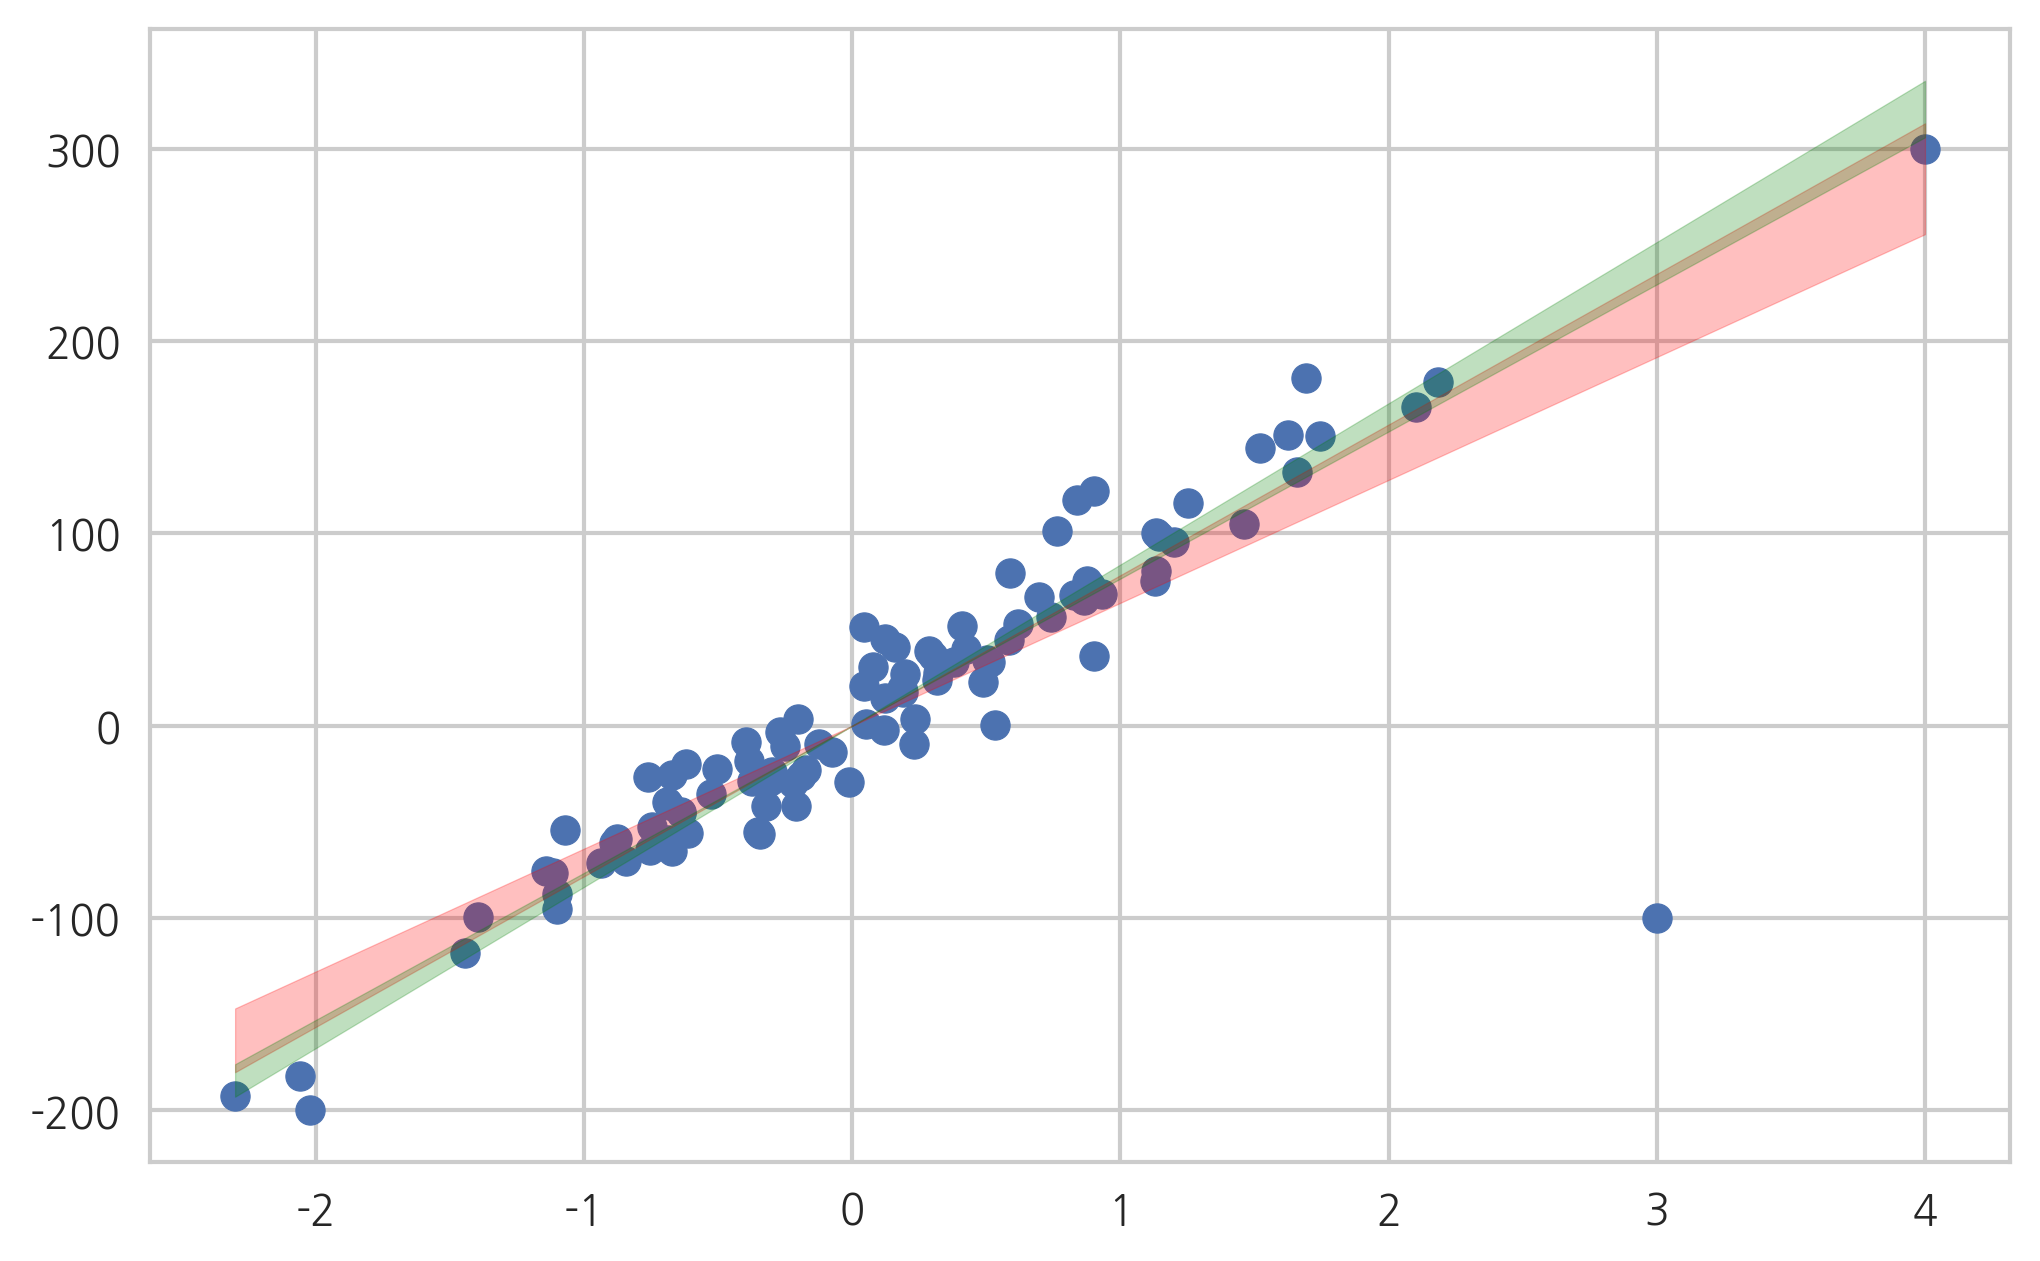

In [308]:
ids = np.argsort(x)
confint1 = pm.df_summary(trace1)[['hpd_2.5', 'hpd_97.5']]['mu__0':'mu__101'].values
confint2 = pm.df_summary(trace2)[['hpd_2.5', 'hpd_97.5']]['mu__0':'mu__101'].values

plt.scatter(x, y_data)
plt.fill_between(x[ids], confint1[ids, 0], confint1[ids, 1], color='red', alpha=0.25)
plt.fill_between(x[ids], confint2[ids, 0], confint2[ids, 1], color='green', alpha=0.25)
plt.show() ## trace1은 정규분포(빨강은 정규분포의 coef범위), trace 2 스튜던트 t 분포(초록은 스튜던트 t분포 coef 범위) 
## 초록색은 실제의 계수값과 거의 비슷